In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv("mutualfundsdata.csv",na_values="-")

In [115]:
df.head()

scheme_name  min_sip  min_lumpsum  \
0  Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                     Aditya Birla SL Arbitrage Fund     1000         1000   
2     Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3   Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4            Aditya Birla SL Balanced Advantage Fund      100          100   

   expense_ratio  fund_size_cr  fund_age_yr        fund_manager  sortino  \
0           0.27          10.0           10      Kaustubh Gupta     0.32   
1           0.36        4288.0           10    Lovelish Solanki     1.33   
2           0.53         157.0           10  Vinod Narayan Bhat     3.44   
3           0.76         637.0            4         Atul Penkar     2.18   
4           0.61        6386.0           10        Mohit Sharma     3.69   

   alpha     sd  beta  sharpe risk_level                           amc_name  \
0   2.24   9.39  0.01    0.24   moderate  Aditya Birla Sun Life Mutual Fund   
1   1.53   0.72  0.56    1.10   very low  Aditya Birla Sun Life Mutual Fund   
2   2.67  10.58  0.67    1.42  very high  Aditya Birla Sun Life Mutual Fund   
3  -6.37  14.99  0.85    0.90    extreme  Aditya Birla Sun Life Mutual Fund   
4   1.99  10.38  0.68    1.39    extreme  Aditya Birla Sun Life Mutual Fund   

   rating           category                                    sub_category  \
0       3              Other                                   FoFs Domestic   
1       3             Hybrid                          Arbitrage Mutual Funds   
2       3              Other                                   FoFs Domestic   
3       2  Solution Oriented                                 Childrens Funds   
4       4             Hybrid  Dynamic Asset Allocation or Balanced Advantage   

   returns_1yr  returns_3yr  returns_5yr  
0          4.0          6.5     6.900000  
1          5.6          4.8     5.500000  
2          2.0         18.9     9.700000  
3         -0.7         17.1     9.747059  
4          4.5         18.6     9.700000

In [5]:
df['sortino'].unique()

array([ 3.200e-01,  1.330e+00,  3.440e+00,  2.180e+00,  3.690e+00,
        2.070e+00,  1.920e+00,  1.420e+00,  2.280e+00,  1.820e+00,
        2.420e+00,  3.780e+00,  1.780e+00,  2.210e+00,  2.540e+00,
        2.550e+00,  3.400e+00,  2.810e+00,  3.240e+00,  3.130e+00,
        3.820e+00,  3.090e+00,  3.360e+00,  9.800e-01,  1.070e+00,
        7.100e-01,  8.800e-01,  3.730e+00,  3.300e+00,  1.280e+00,
        2.450e+00,  5.280e+00,  4.760e+00,  2.430e+00,  2.290e+00,
        3.110e+00,  4.580e+00,  3.420e+00,  1.100e-01,  2.310e+00,
        3.880e+00,  2.410e+00,  2.340e+00,  2.900e-01,  2.200e-01,
        4.230e+00,  3.700e+00,  1.940e+00,  1.770e+00,  1.470e+00,
        2.260e+00,  2.780e+00,  1.810e+00,  2.880e+00,  1.970e+00,
        6.100e-01,  2.370e+00,  2.390e+00,        nan,  1.440e+00,
        7.270e+00,  1.150e+00,  2.640e+00,  4.540e+00,  1.450e+00,
        2.980e+00,  4.810e+00,  2.930e+00,  4.900e-01,  1.580e+00,
        1.840e+00,  1.560e+00,  3.900e+00,  2.270e+00,  2.350e

In [6]:
df['sharpe'].unique()

array([ 0.24,  1.1 ,  1.42,  0.9 ,  1.39,  0.97,  1.09,  1.06,  1.35,
        1.47,  1.53,  1.58,  1.02,  1.16,  1.33,  1.2 ,  1.27,  1.66,
        1.26,  1.4 ,  1.57,  1.44,  0.7 ,  0.45,  0.57,  0.64,  1.43,
        0.81,  1.14,  2.05,  1.18,  0.93,  1.54,  1.94,  1.29,  0.02,
        1.36,  2.08,  0.94,  0.13,  0.18,  1.96,  1.51,  0.83,  1.21,
        1.05,  1.11,  1.28,  1.77,  1.19,  0.92,   nan,  0.74,  2.19,
        0.6 ,  0.49,  0.96,  0.75,  1.91,  1.24,  0.09,  1.37,  0.79,
        1.04,  0.76,  1.38,  2.06,  1.46,  1.75,  1.08,  2.25,  1.31,
       -0.78,  0.38,  1.8 ,  1.59,  0.39,  0.43,  1.93,  1.5 ,  1.07,
        0.85,  0.82,  1.12,  0.28,  1.32,  0.32,  1.67,  0.05,  0.88,
        1.74,  1.48,  0.47,  0.  ,  0.87,  2.17,  0.84,  0.62,  0.58,
        1.03,  1.25,  1.23,  0.67,  1.78,  1.3 ,  0.12,  1.55,  1.15,
        0.41,  0.4 ,  1.72,  0.55,  0.3 ,  1.73,  0.01,  1.98,  1.6 ,
        0.5 ,  0.04, -0.18,  1.49,  0.98,  1.87,  0.99,  1.61,  1.56,
        1.76,  1.71,

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [8]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [9]:
df.groupby("category")[['sortino','alpha','sd','beta','sharpe']].mean()

sortino     alpha         sd      beta    sharpe
category                                                            
Debt               2.139885  2.160000   2.092107  0.807214  0.892366
Equity             3.110392  3.402550  16.959477  0.878642  1.459837
Hybrid             2.776552  2.486034   7.493190  0.707155  1.311638
Other              2.420633  0.513594  15.480506  0.850938  1.090253
Solution Oriented  2.589286  0.700357  10.272143  0.765714  1.204286

In [10]:
df.groupby("category")[['returns_3yr','returns_5yr']].mean()

returns_3yr  returns_5yr
category                                   
Debt                  6.228517     6.385446
Equity               29.738111    12.069767
Hybrid               15.272414     8.581053
Other                20.792405    10.710938
Solution Oriented    18.167857     9.747059

In [11]:
df.groupby("category")['sortino'].apply(lambda x: x.fillna(x.mean()))

category              
Debt               6      1.92
                   8      2.28
                   9      1.82
                   12     1.78
                   17     2.81
                          ... 
Solution Oriented  737    2.60
                   738    2.45
                   744    2.85
                   778    3.00
                   804    3.59
Name: sortino, Length: 814, dtype: float64

In [12]:
df['sortino']=df.groupby("category")['sortino'].transform(lambda x: x.fillna(x.mean()))

In [13]:
df['alpha']=df.groupby("category")['alpha'].transform(lambda x: x.fillna(x.mean()))

In [14]:
df['sd']=df.groupby("category")['sd'].transform(lambda x: x.fillna(x.mean()))

In [15]:
df['beta']=df.groupby("category")['beta'].transform(lambda x: x.fillna(x.mean()))

In [16]:
df['sharpe']=df.groupby("category")['sharpe'].transform(lambda x: x.fillna(x.mean()))

In [17]:
df.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino            0
alpha              0
sd                 0
beta               0
sharpe             0
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

In [18]:
df['returns_3yr']=df.groupby("category")['returns_3yr'].transform(lambda x: x.fillna(x.mean()))

In [19]:
df['returns_5yr']=df.groupby("category")['returns_5yr'].transform(lambda x: x.fillna(x.mean()))

In [20]:
df.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

In [21]:
df['risk_level']=df['risk_level'].replace({1:'very low',2:'low',3:'moderate',4:'high',5:'very high',6:'extreme'})

<Axes: >

<Figure size 2000x2000 with 0 Axes>

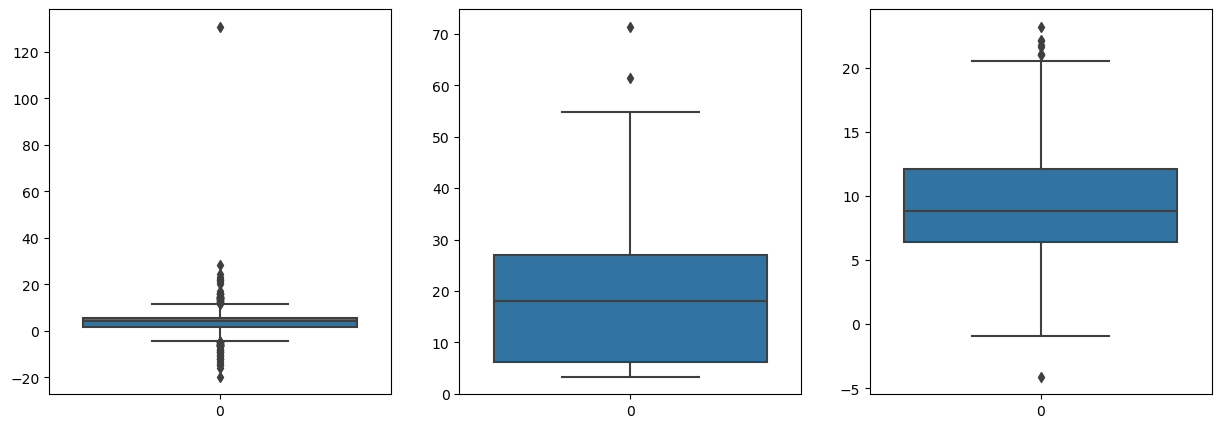

In [22]:
plt.figure(figsize=(20,20))
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.boxplot(df['returns_1yr'],ax=ax[0])
sns.boxplot(df['returns_3yr'],ax=ax[1])
sns.boxplot(df['returns_5yr'],ax=ax[2])

In [23]:
pd.set_option('display.max_rows',None)

<Axes: xlabel='sortino', ylabel='returns_3yr'>

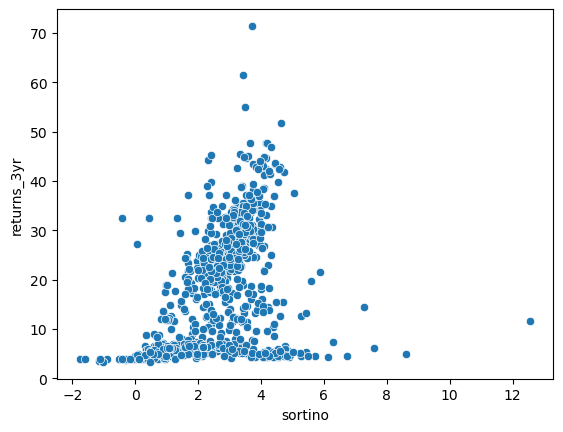

In [24]:
sns.scatterplot(data=df,y='returns_3yr',x='sortino')

<Axes: xlabel='sharpe', ylabel='returns_3yr'>

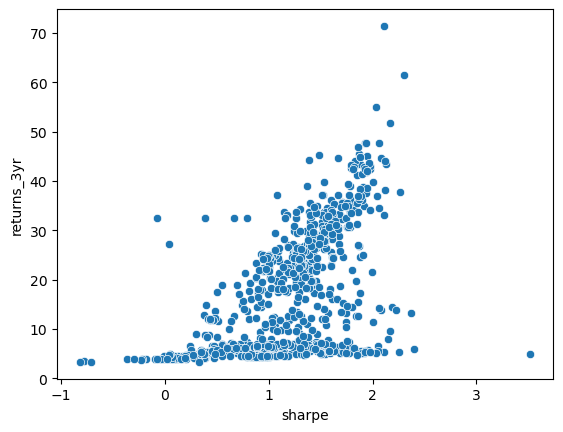

In [25]:
sns.scatterplot(data=df,y='returns_3yr',x='sharpe')

<Axes: xlabel='alpha', ylabel='returns_3yr'>

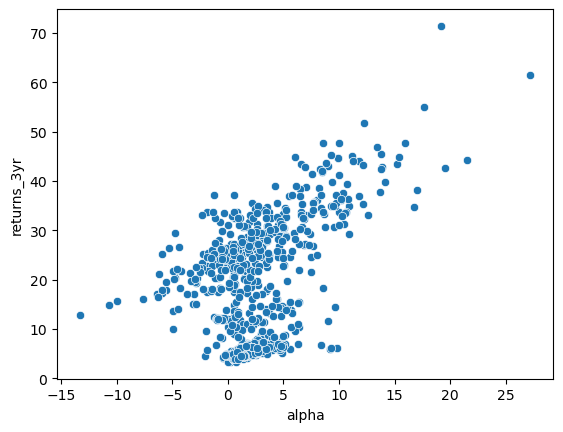

In [26]:
sns.scatterplot(data=df,y='returns_3yr',x='alpha')

<Axes: xlabel='sd', ylabel='returns_3yr'>

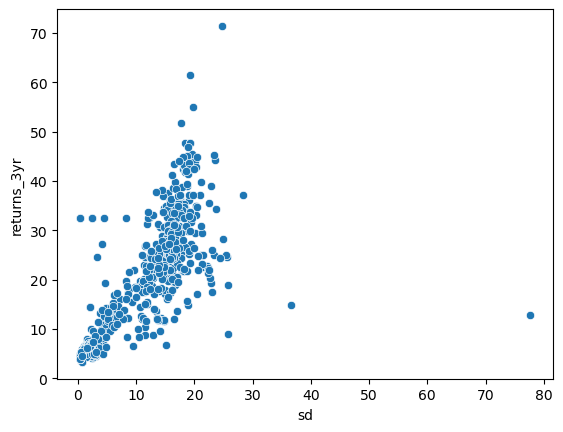

In [27]:
sns.scatterplot(data=df,y='returns_3yr',x='sd')

<Axes: xlabel='beta', ylabel='returns_3yr'>

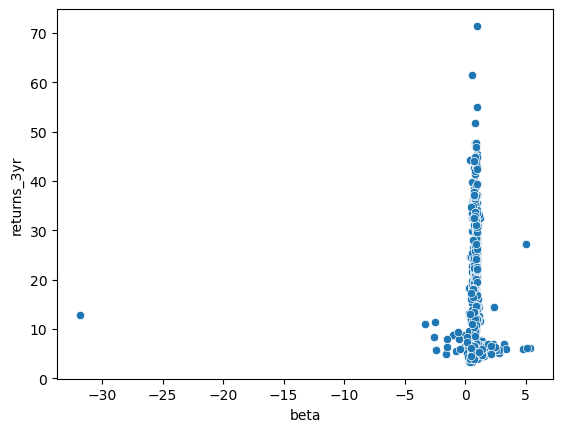

In [28]:
sns.scatterplot(data=df,y='returns_3yr',x='beta')

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


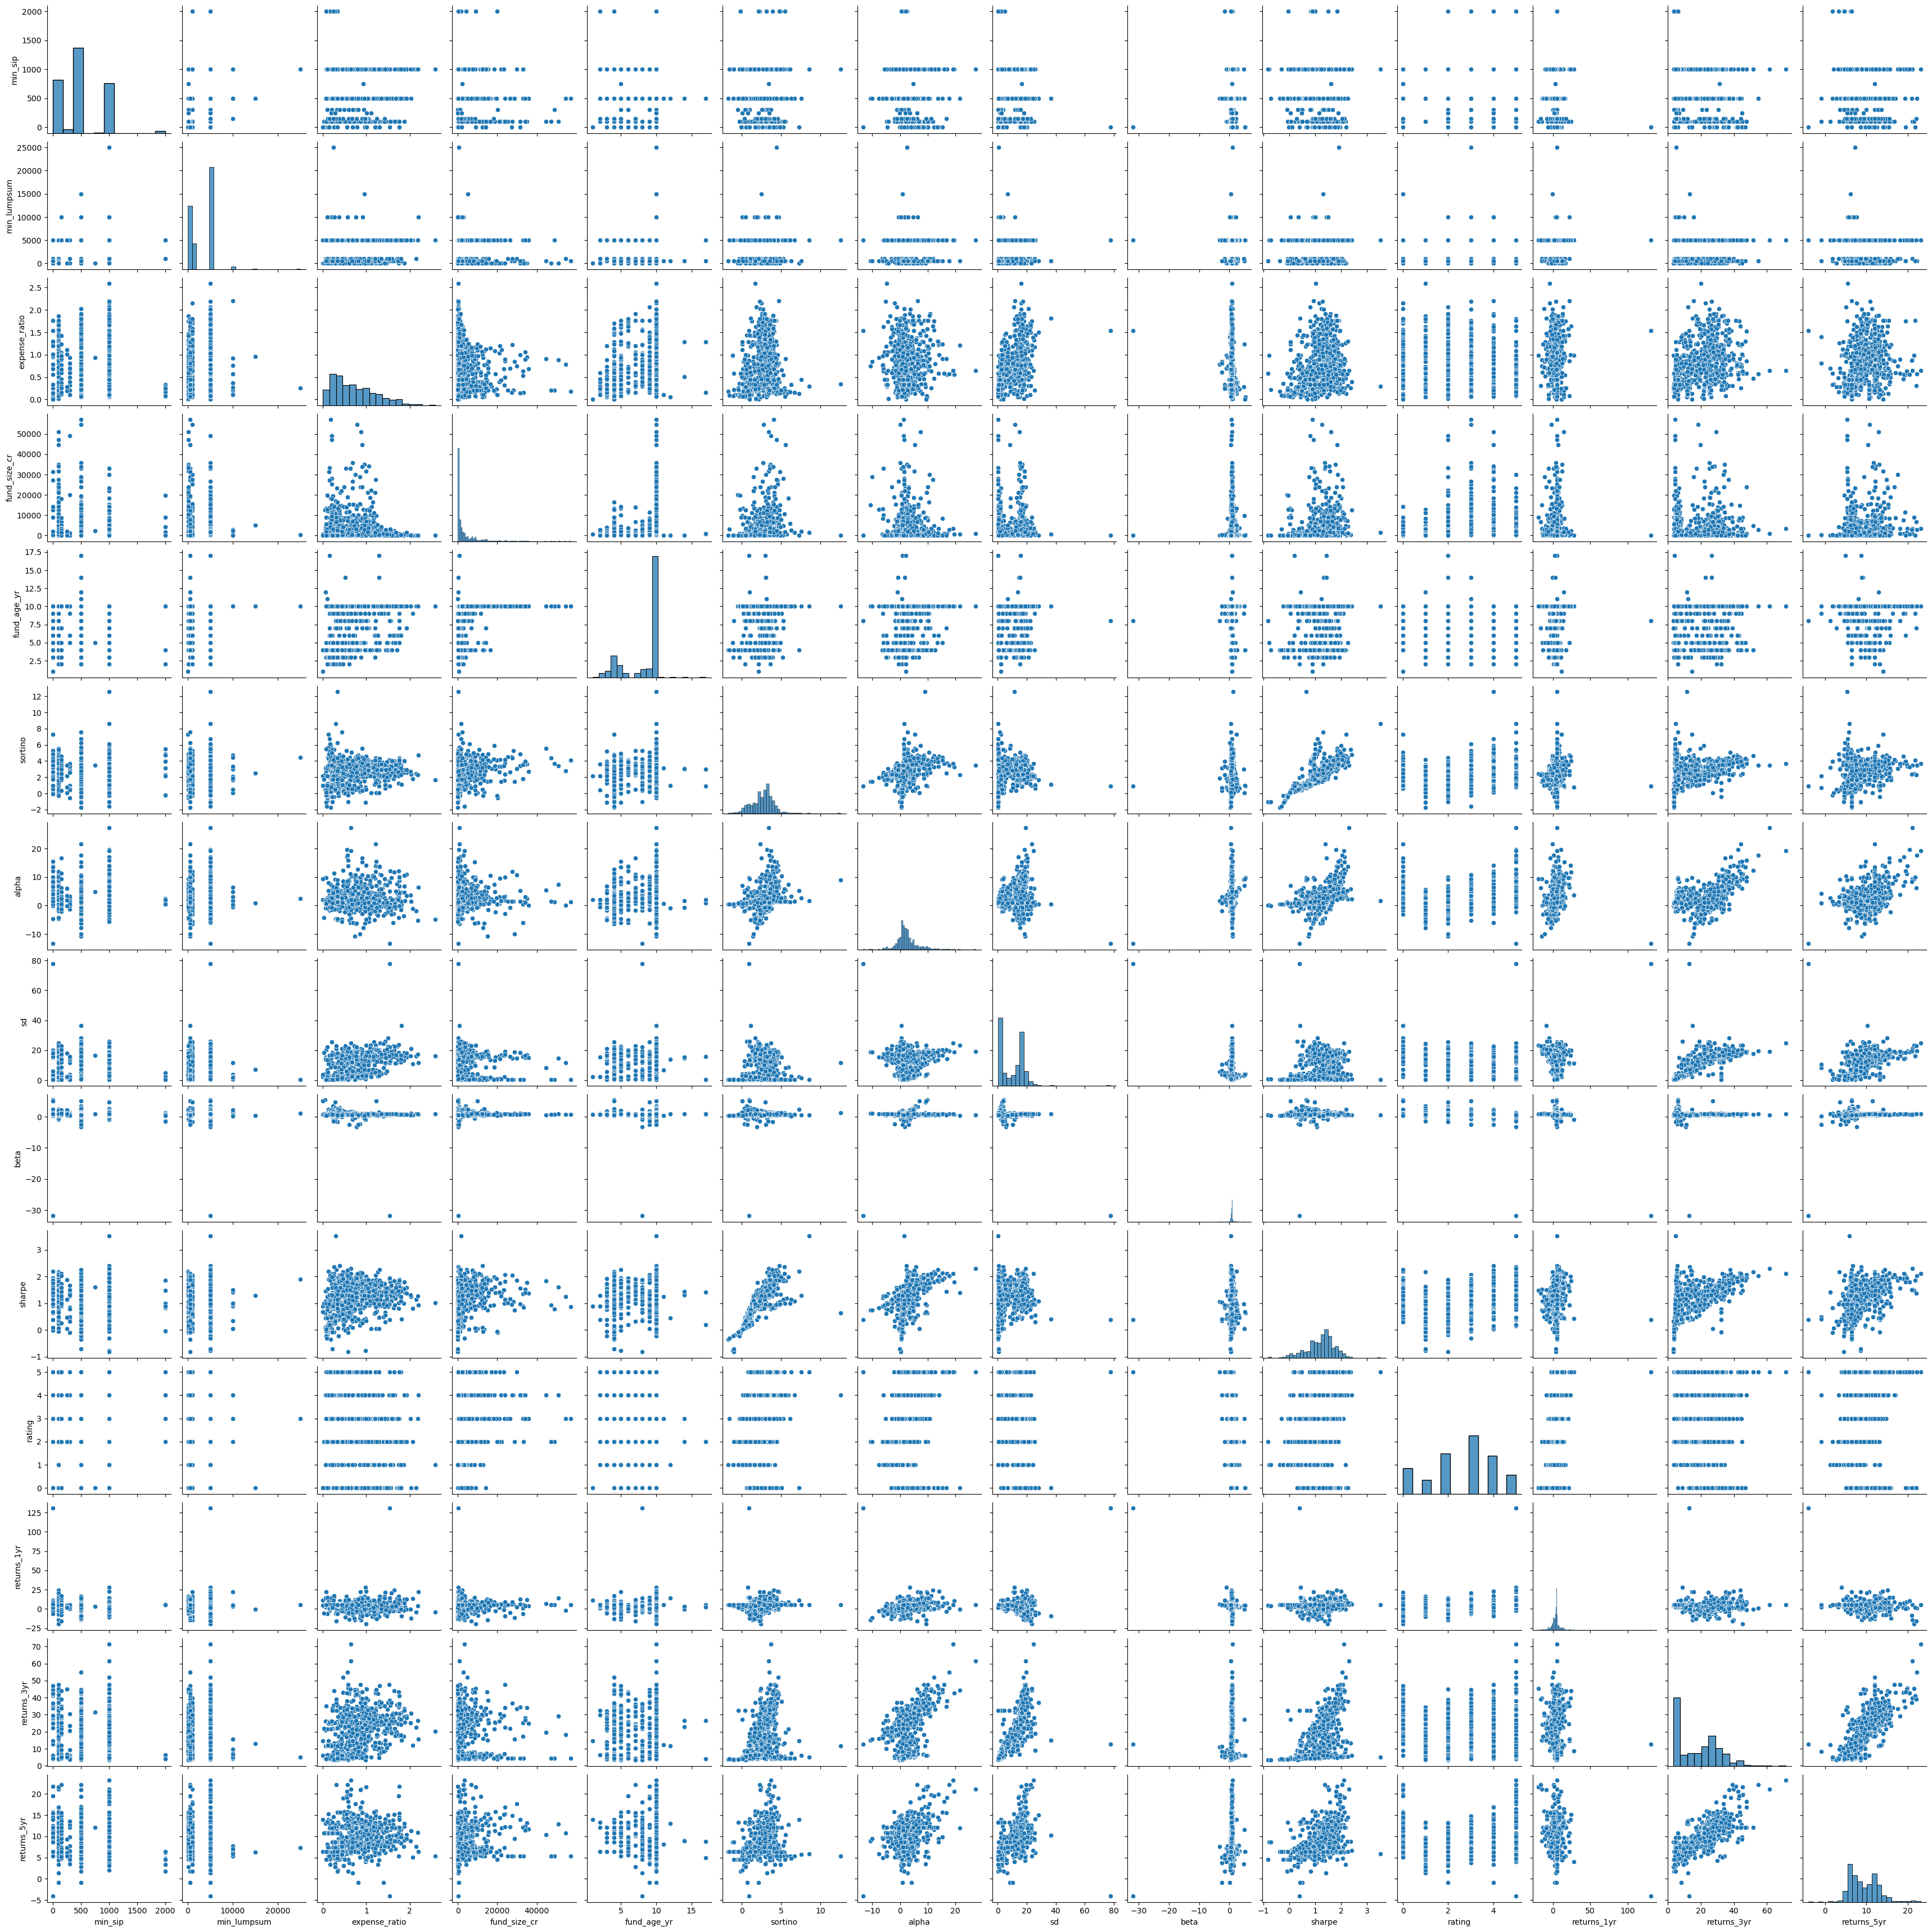

In [29]:
sns.pairplot(df)

<Axes: ylabel='fund_manager'>

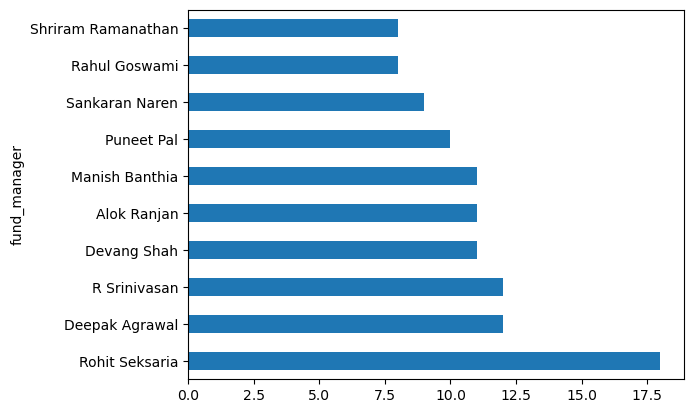

In [30]:
df['fund_manager'].value_counts().iloc[0:10].plot(kind='barh')

In [31]:
year1_return = df.groupby('fund_manager')['returns_1yr'].mean().sort_values(ascending=False).iloc[0:10]

<Axes: ylabel='fund_manager'>

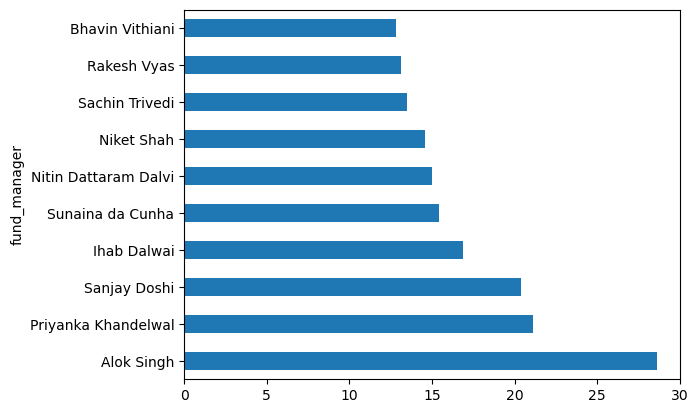

In [32]:
year1_return.plot(kind='barh')

In [33]:
year3_return = df.groupby('fund_manager')['returns_3yr'].mean().sort_values(ascending=False).iloc[0:10]

<Axes: ylabel='fund_manager'>

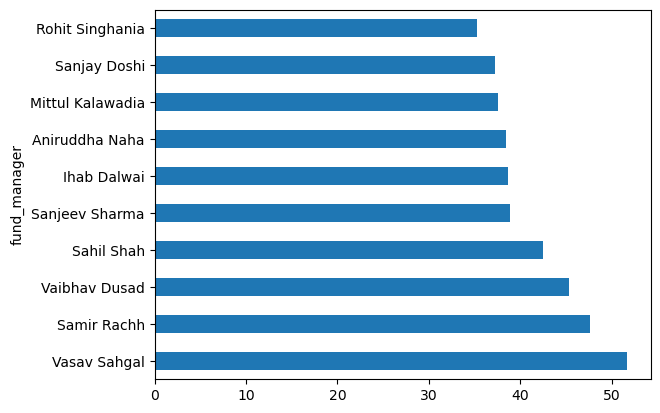

In [34]:
year3_return.plot(kind='barh')

In [35]:
year5_return = df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[0:10]

<Axes: ylabel='fund_manager'>

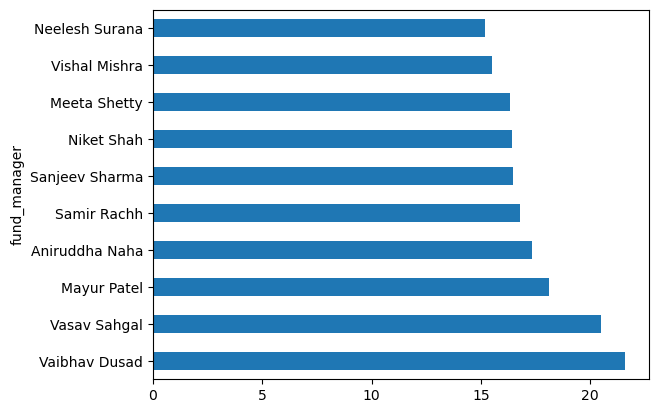

In [36]:
year5_return.plot(kind='barh')

In [39]:
df[df['fund_manager']=='Alok Singh']

scheme_name  min_sip  min_lumpsum  \
86                      Bank of India Arbitrage Fund     1000         5000   
87             Bank of India Balanced Advantage Fund     1000         5000   
88            Bank of India Conservative Hybrid Fund     1000        10000   
89                    Bank of India Credit Risk Fund        0         5000   
93  Bank of India Mid & Small Cap Equity & Debt Fund     1000         5000   
99                  Bank of India Tax Advantage Fund      500          500   

    expense_ratio  fund_size_cr  fund_age_yr fund_manager  sortino  alpha  \
86           0.98          12.0            5   Alok Singh    -1.14   0.24   
87           2.07          90.0            9   Alok Singh     1.81  -1.05   
88           2.20          63.0           10   Alok Singh     4.71   6.44   
89           1.54         161.0            8   Alok Singh     0.91 -13.36   
93           1.92         380.0            7   Alok Singh     2.56  10.87   
99           1.31         676.0           10   Alok Singh     2.88   3.48   

       sd   beta  sharpe risk_level                   amc_name  rating  \
86   0.60   0.52   -0.78   very low  Bank of India Mutual Fund       1   
87  11.04   0.54    0.81    extreme  Bank of India Mutual Fund       2   
88  11.85   0.64    0.93   moderate  Bank of India Mutual Fund       4   
89  77.72 -31.86    0.38       high  Bank of India Mutual Fund       5   
93  15.51   0.75    1.59    extreme  Bank of India Mutual Fund       4   
99  16.30   0.89    1.50    extreme  Bank of India Mutual Fund       4   

   category                                    sub_category  returns_1yr  \
86   Hybrid                          Arbitrage Mutual Funds          4.2   
87   Hybrid  Dynamic Asset Allocation or Balanced Advantage         13.6   
88   Hybrid                Conservative Hybrid Mutual Funds         22.3   
89     Debt                               Credit Risk Funds        130.8   
93   Hybrid                  Aggressive Hybrid Mutual Funds         -0.3   
99   Equity                               ELSS Mutual Funds          0.9   

    returns_3yr  returns_5yr  
86          3.4     8.581053  
87         12.1     5.100000  
88         15.5     6.400000  
89         12.8    -4.100000  
93         29.3    10.400000  
99         29.0    13.200000

In [40]:
debt_df=df.groupby('category').get_group('Debt')
hybrid_df=df.groupby('category').get_group('Hybrid')
equity_df=df.groupby('category').get_group('Equity')
others_df=df.groupby('category').get_group('Other')
solution_oriented_df=df.groupby('category').get_group('Solution Oriented')

In [41]:
debt=debt_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[:5]
equity=equity_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[:5]
hybrid=hybrid_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[:5]
others=others_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[:5]
solution_oriented=solution_oriented_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).iloc[:5]

<Axes: xlabel='fund_manager'>

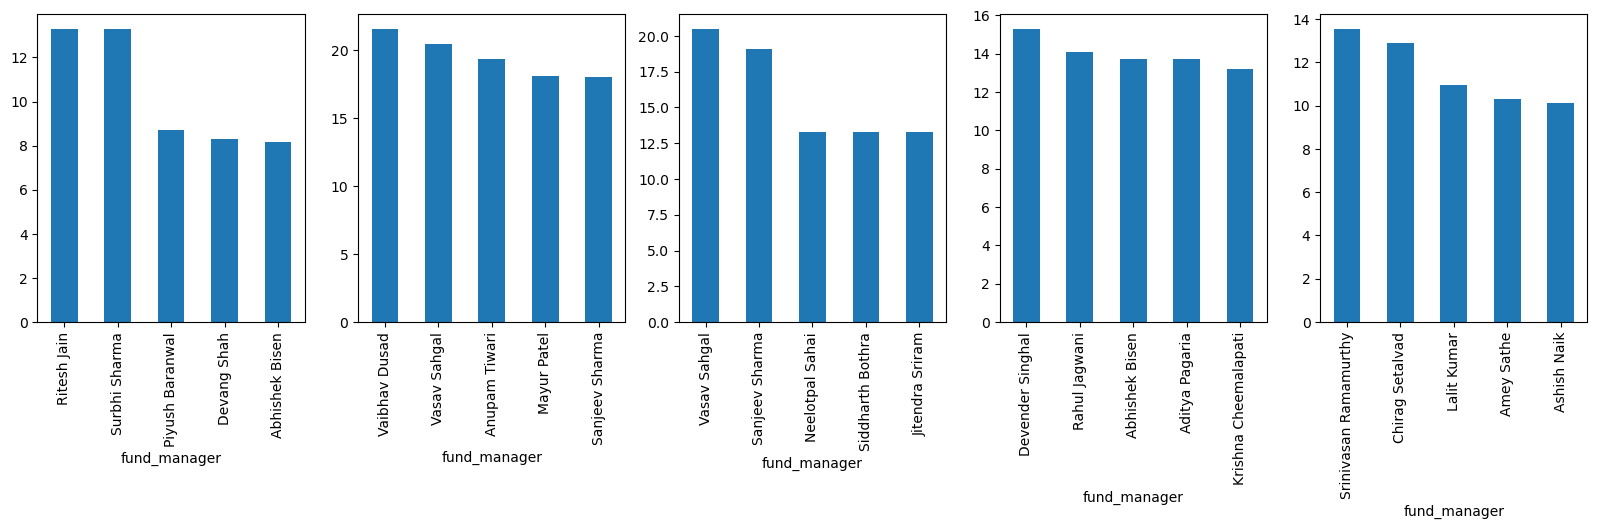

In [42]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,4))
debt.plot(kind='bar',ax=ax[0])
equity.plot(kind='bar',ax=ax[1])
hybrid.plot(kind='bar',ax=ax[2])
others.plot(kind='bar',ax=ax[3])
solution_oriented.plot(kind='bar',ax=ax[4])

<Axes: xlabel='fund_age_yr', ylabel='Count'>

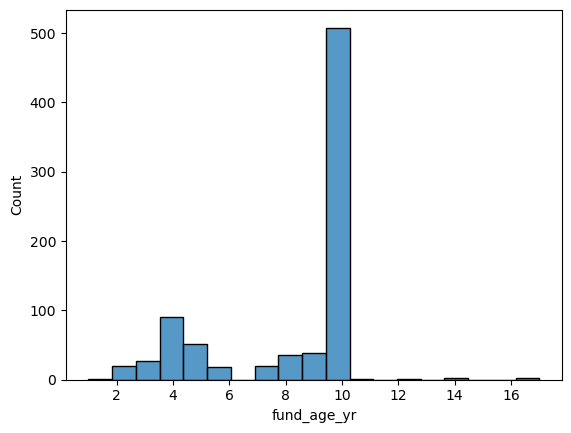

In [43]:
sns.histplot(df['fund_age_yr'])

In [44]:
import plotly.express as px
px.histogram(df,x='fund_age_yr',color='category')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'moderate'),
  Text(1, 0, 'very low'),
  Text(2, 0, 'very high'),
  Text(3, 0, 'extreme'),
  Text(4, 0, 'low'),
  Text(5, 0, 'high')])

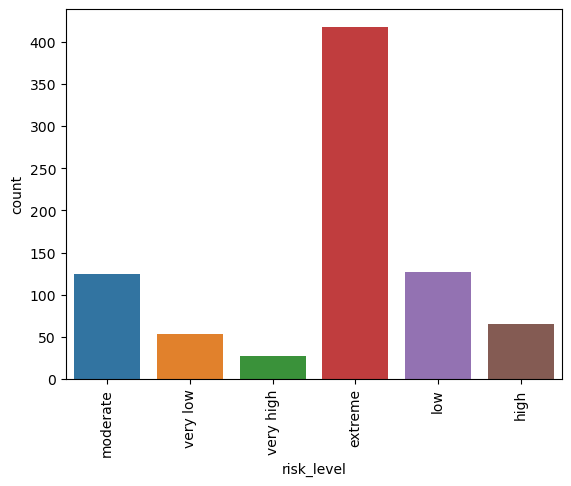

In [45]:
sns.countplot(x=df['risk_level'])
plt.xticks(rotation='vertical')

<Axes: xlabel='risk_level', ylabel='returns_5yr'>

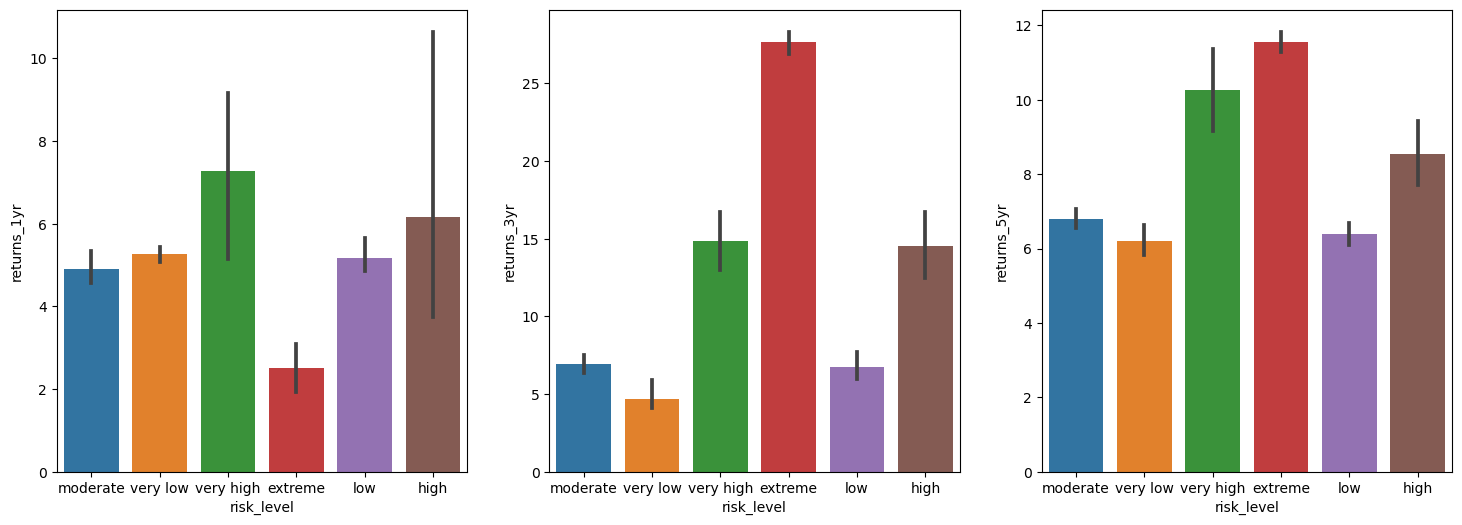

In [46]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
sns.barplot(data=df,x='risk_level',y='returns_1yr',ax=ax[0])
sns.barplot(data=df,x='risk_level',y='returns_3yr',ax=ax[1])
sns.barplot(data=df,x='risk_level',y='returns_5yr',ax=ax[2])

<Axes: xlabel='rating', ylabel='returns_3yr'>

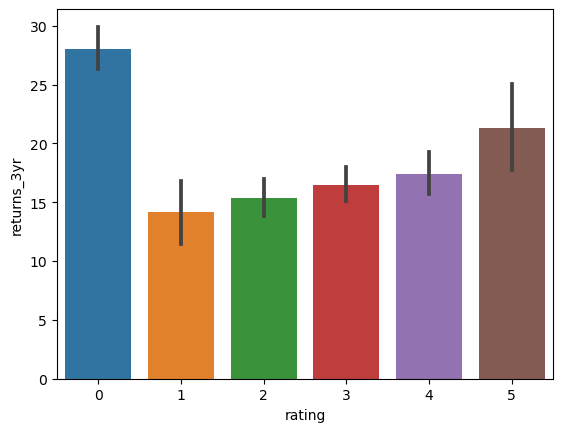

In [47]:
sns.barplot(data=df,x='rating',y='returns_3yr')

<Axes: xlabel='rating', ylabel='returns_5yr'>

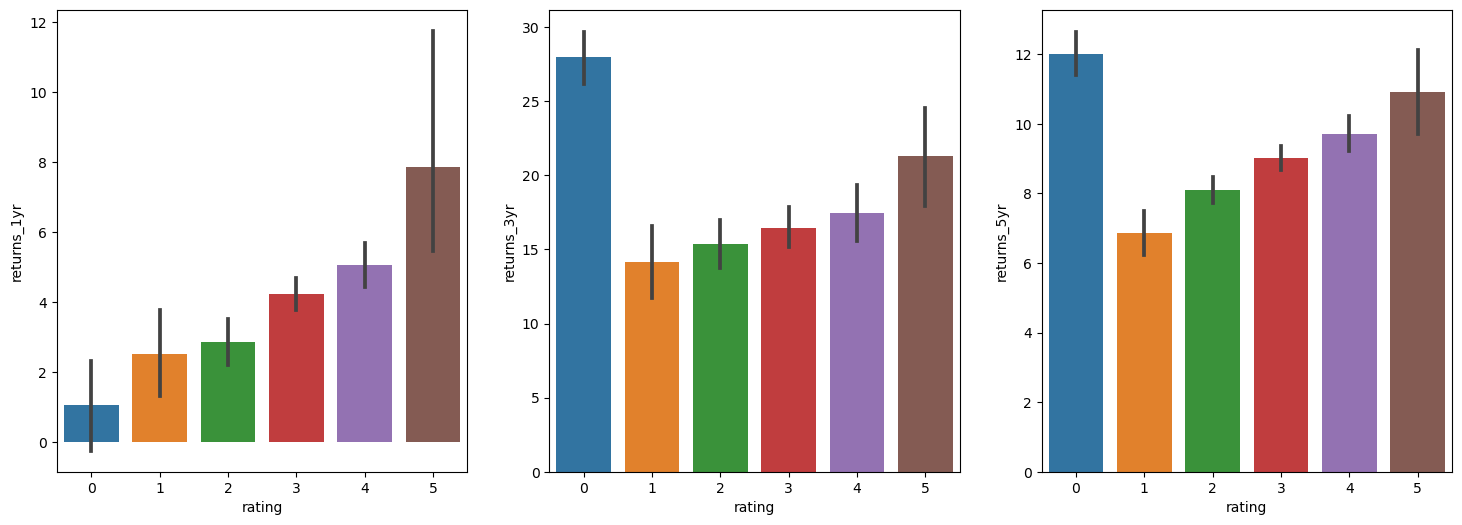

In [48]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
sns.barplot(data=df,x='rating',y='returns_1yr',ax=ax[0])
sns.barplot(data=df,x='rating',y='returns_3yr',ax=ax[1])
sns.barplot(data=df,x='rating',y='returns_5yr',ax=ax[2])

<Axes: xlabel='category', ylabel='count'>

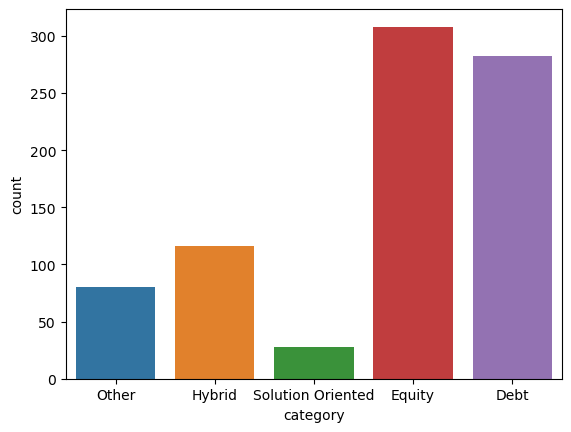

In [88]:
sns.countplot(x=df['category'])

<Axes: xlabel='category', ylabel='returns_5yr'>

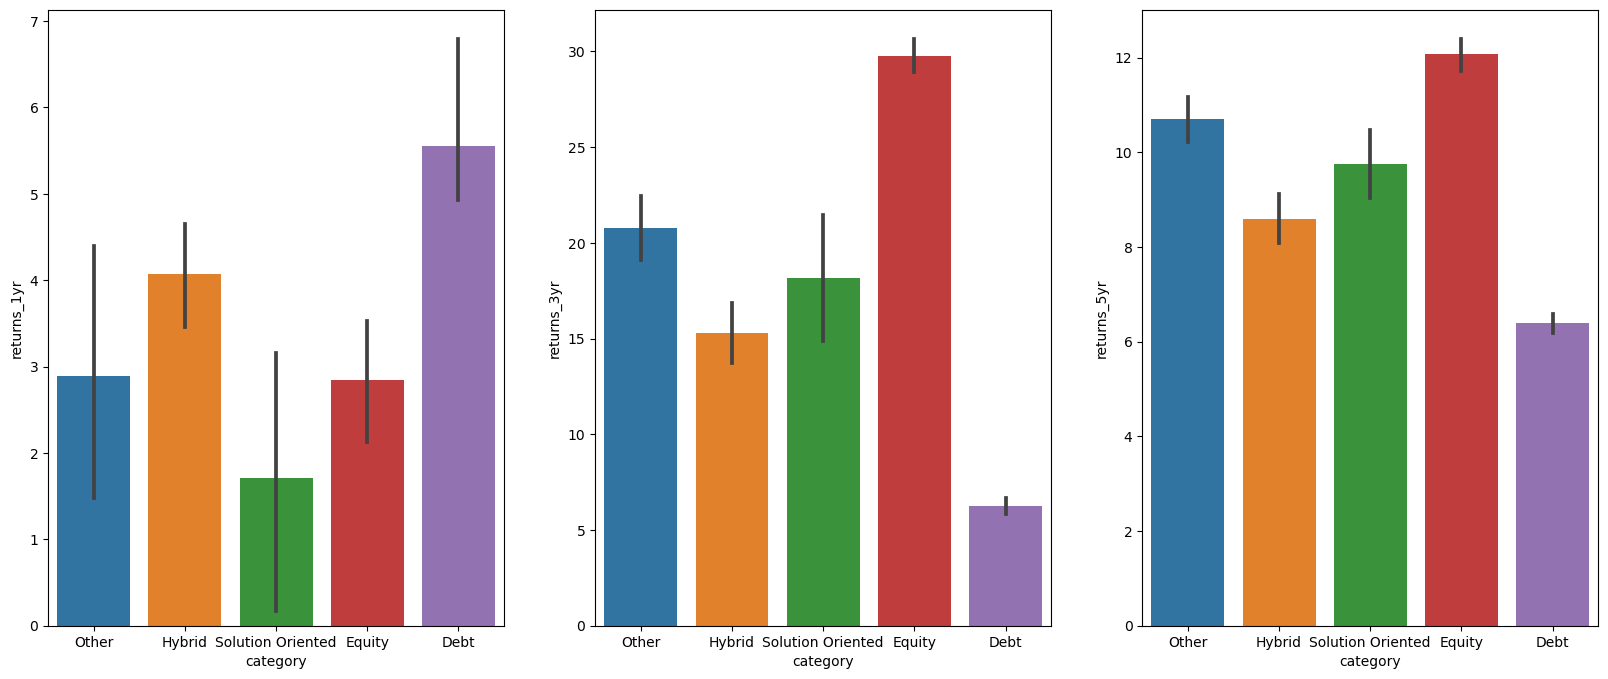

In [92]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.barplot(data=df,x='category',y='returns_1yr',ax=ax[0])
sns.barplot(data=df,x='category',y='returns_3yr',ax=ax[1])
sns.barplot(data=df,x='category',y='returns_5yr',ax=ax[2])

<Axes: xlabel='count', ylabel='sub_category'>

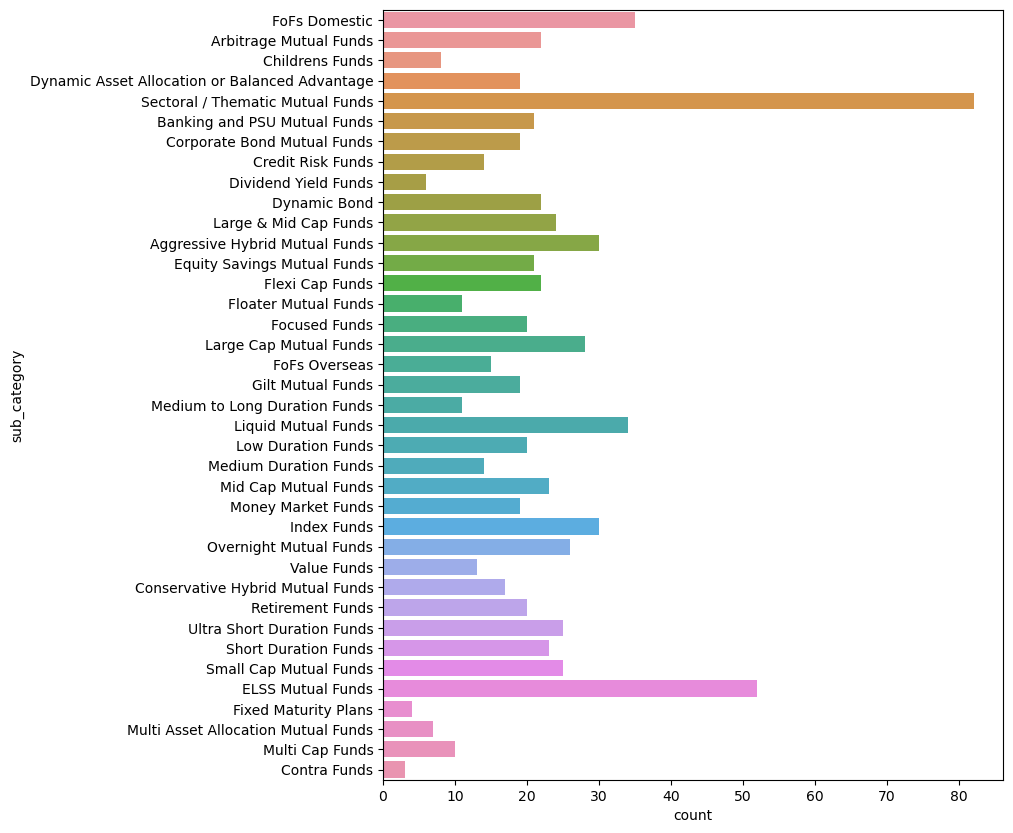

In [97]:
plt.figure(figsize=(8,10))
sns.countplot(y=df['sub_category'])

[Text(0, 0, 'Banking and PSU Mutual Funds'),
 Text(1, 0, 'Corporate Bond Mutual Funds'),
 Text(2, 0, 'Credit Risk Funds'),
 Text(3, 0, 'Dynamic Bond'),
 Text(4, 0, 'Floater Mutual Funds'),
 Text(5, 0, 'Gilt Mutual Funds'),
 Text(6, 0, 'Medium to Long Duration Funds'),
 Text(7, 0, 'Liquid Mutual Funds'),
 Text(8, 0, 'Low Duration Funds'),
 Text(9, 0, 'Medium Duration Funds'),
 Text(10, 0, 'Money Market Funds'),
 Text(11, 0, 'Overnight Mutual Funds'),
 Text(12, 0, 'Ultra Short Duration Funds'),
 Text(13, 0, 'Short Duration Funds'),
 Text(14, 0, 'Fixed Maturity Plans')]

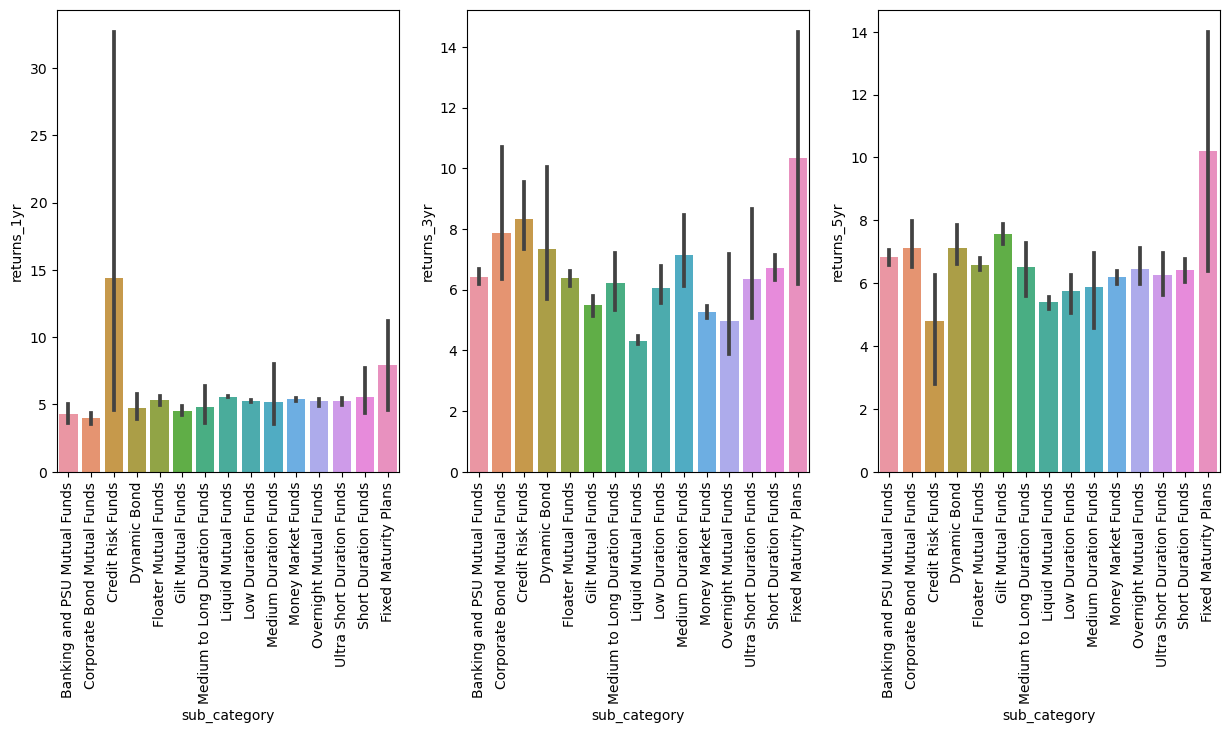

In [145]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.barplot(data=debt_df,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(debt_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=debt_df,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(debt_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=debt_df,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(debt_df['sub_category'].unique(),rotation='vertical')

[Text(0, 0, 'Arbitrage Mutual Funds'),
 Text(1, 0, 'Dynamic Asset Allocation or Balanced Advantage'),
 Text(2, 0, 'Aggressive Hybrid Mutual Funds'),
 Text(3, 0, 'Equity Savings Mutual Funds'),
 Text(4, 0, 'Conservative Hybrid Mutual Funds'),
 Text(5, 0, 'Multi Asset Allocation Mutual Funds')]

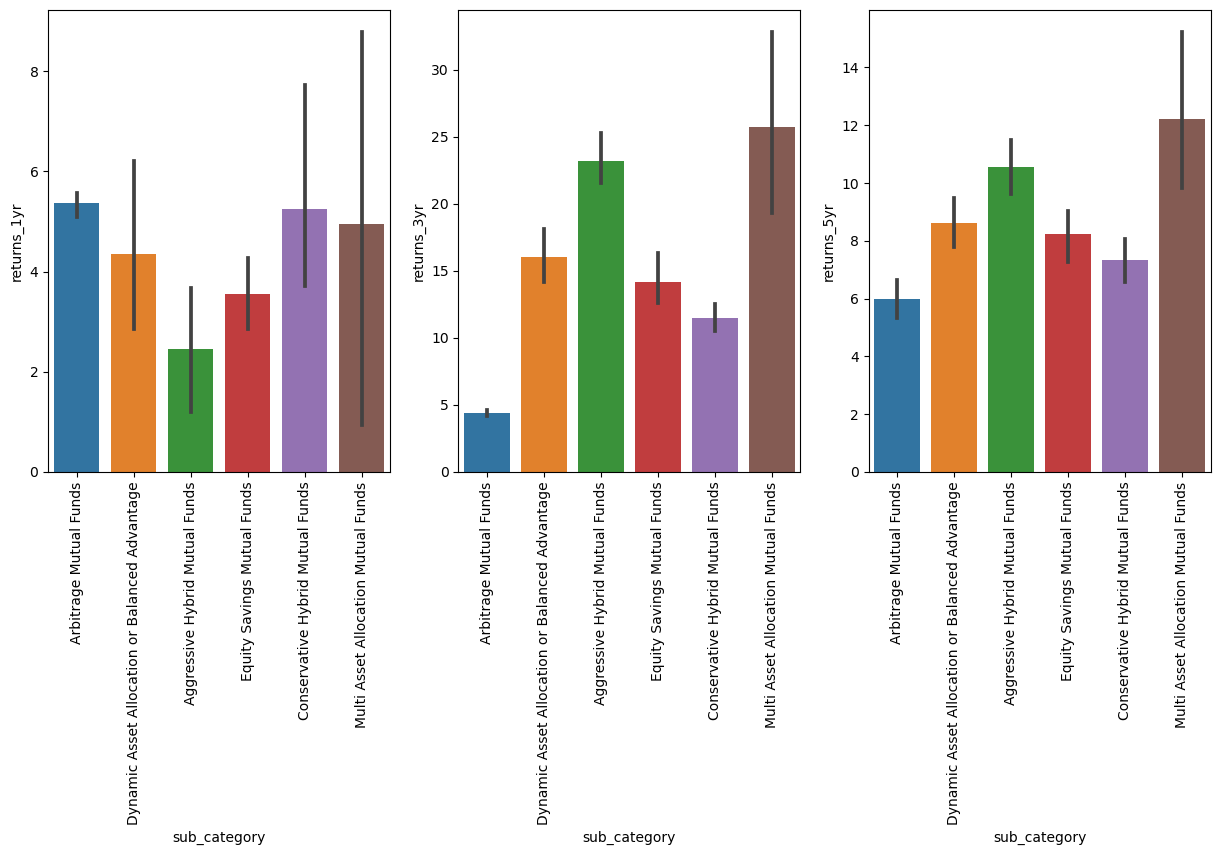

In [147]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.barplot(data=hybrid_df,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(hybrid_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=hybrid_df,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(hybrid_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=hybrid_df,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(hybrid_df['sub_category'].unique(),rotation='vertical')

[Text(0, 0, 'Sectoral / Thematic Mutual Funds'),
 Text(1, 0, 'Dividend Yield Funds'),
 Text(2, 0, 'Large & Mid Cap Funds'),
 Text(3, 0, 'Flexi Cap Funds'),
 Text(4, 0, 'Focused Funds'),
 Text(5, 0, 'Large Cap Mutual Funds'),
 Text(6, 0, 'Mid Cap Mutual Funds'),
 Text(7, 0, 'Value Funds'),
 Text(8, 0, 'Small Cap Mutual Funds'),
 Text(9, 0, 'ELSS Mutual Funds'),
 Text(10, 0, 'Multi Cap Funds'),
 Text(11, 0, 'Contra Funds')]

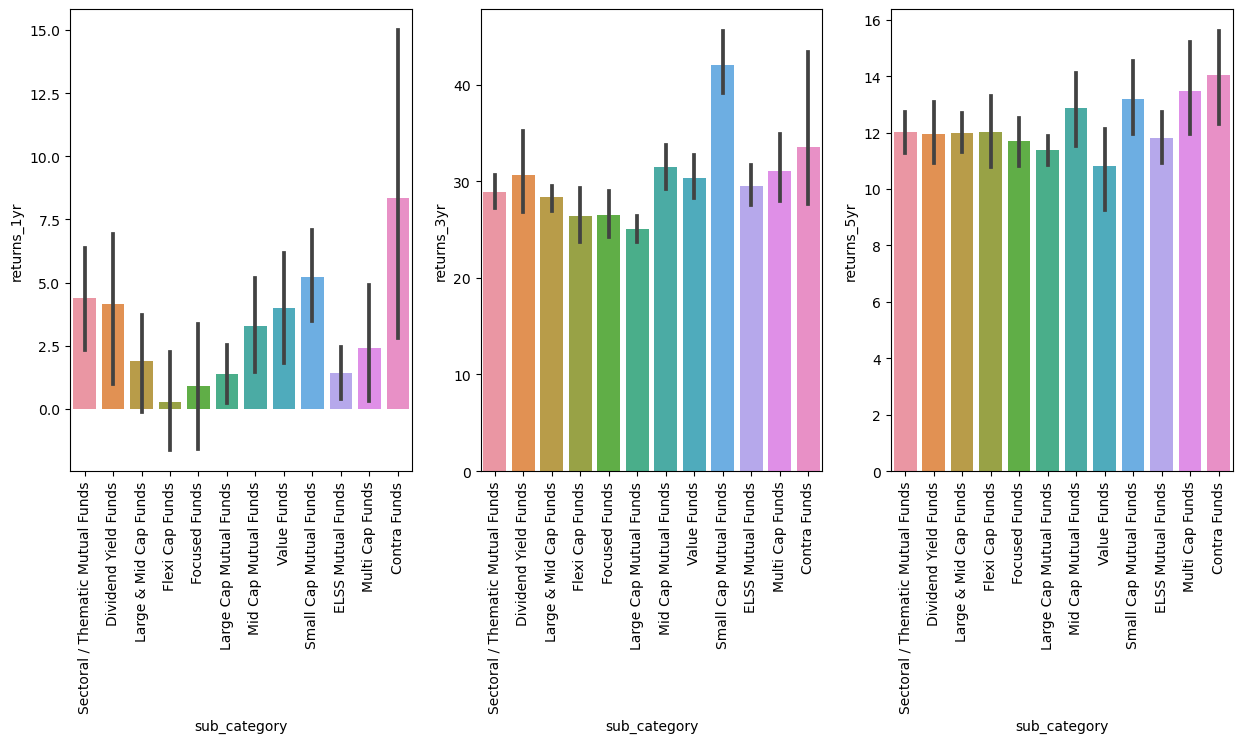

In [148]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.barplot(data=equity_df,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(equity_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=equity_df,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(equity_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=equity_df,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(equity_df['sub_category'].unique(),rotation='vertical')

[Text(0, 0, 'FoFs Domestic'),
 Text(1, 0, 'FoFs Overseas'),
 Text(2, 0, 'Index Funds')]

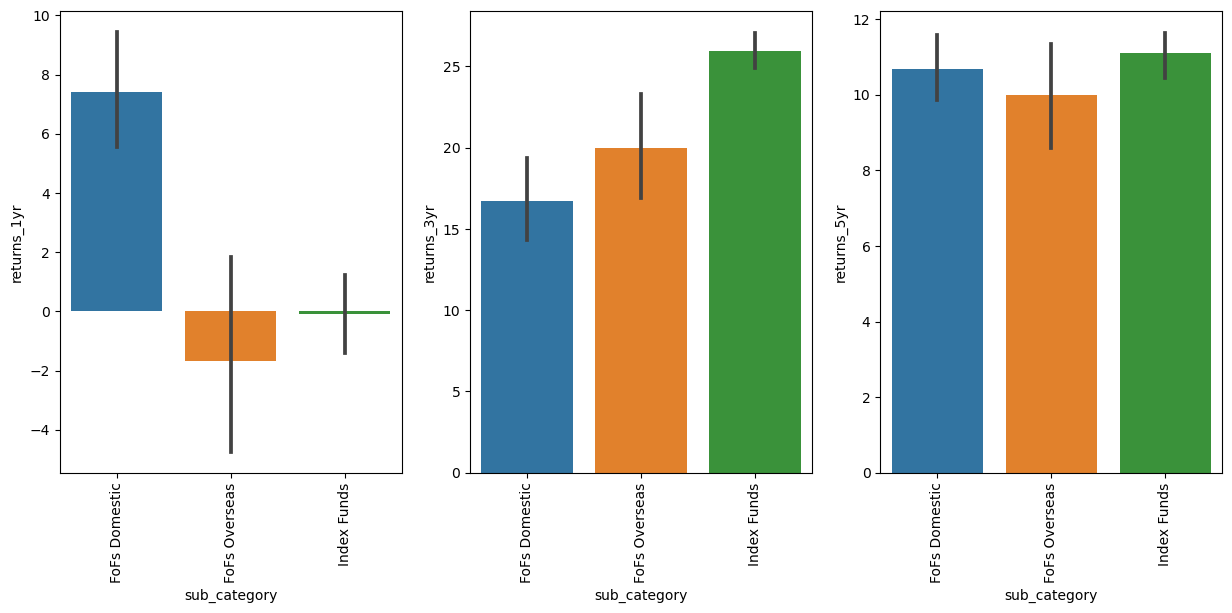

In [149]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.barplot(data=others_df,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(others_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=others_df,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(others_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=others_df,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(others_df['sub_category'].unique(),rotation='vertical')

[Text(0, 0, 'Childrens Funds'), Text(1, 0, 'Retirement Funds')]

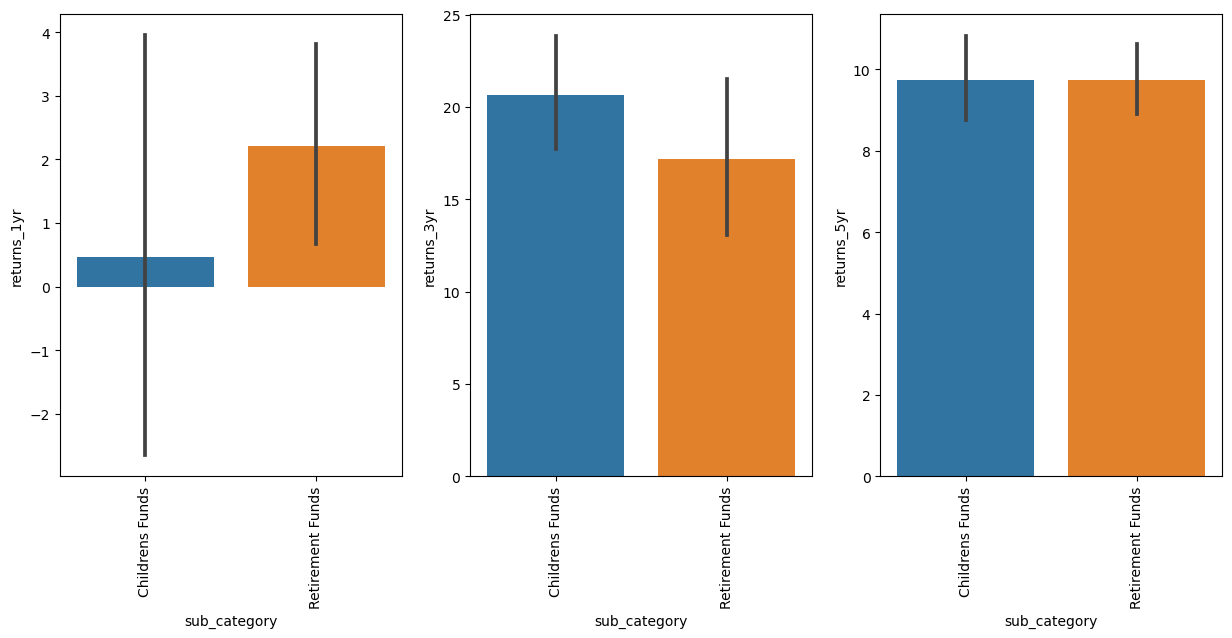

In [150]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.barplot(data=solution_oriented_df,x='sub_category',y='returns_1yr',ax=ax[0])
ax[0].set_xticklabels(solution_oriented_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=solution_oriented_df,x='sub_category',y='returns_3yr',ax=ax[1])
ax[1].set_xticklabels(solution_oriented_df['sub_category'].unique(),rotation='vertical')
sns.barplot(data=solution_oriented_df,x='sub_category',y='returns_5yr',ax=ax[2])
ax[2].set_xticklabels(solution_oriented_df['sub_category'].unique(),rotation='vertical')